## Overview
#### This script applies a cartoonification effect to an image using several image processing techniques:
#### 1. **Grayscale Conversion**: Converts the image to grayscale for edge detection.
#### 2. **Noise Reduction**: Uses a median blur to reduce noise and preserve edges.
#### 3. **Edge Detection**: Detects edges using the Laplacian operator.
#### 4. **Thresholding**: Enhances edges using binary thresholding.
#### 5. **Color Smoothing**: Applies a bilateral filter to smooth colors while preserving edges.
#### 6. **Edge Overlay**: Combines the processed edges with the color-smoothed image to create a cartoon effect.


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def show_images(title1, image1, title2, image2):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title(title1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.title(title2)
    if len(image2.shape) == 2:
        plt.imshow(image2, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.show()

In [8]:
# Load the image
image = cv2.imread('img1.jpg')

## Grayscale Conversion
#### Converts the image to grayscale, which simplifies processing by removing color information.
#### converts the image from one color space to another

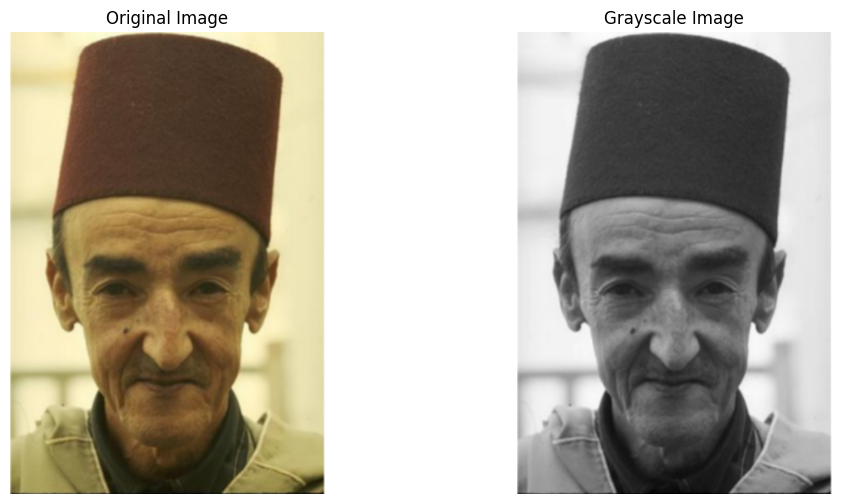

In [ ]:
#cv2.COLOR_BGR2GRAY converts from BGR to grayscale to bprepare it to image detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_images('Original Image', image, 'Grayscale Image', gray)

## Noise Reduction
#### Uses a median filter to reduce noise while preserving edges.
#### **Kernel size (5)**: Defines the window for calculating median values.
#### Kernel size refers to the size of the filter window used to compute the median value for each pixel -> a larger kernel size results in stronger smoothing but may blur details.

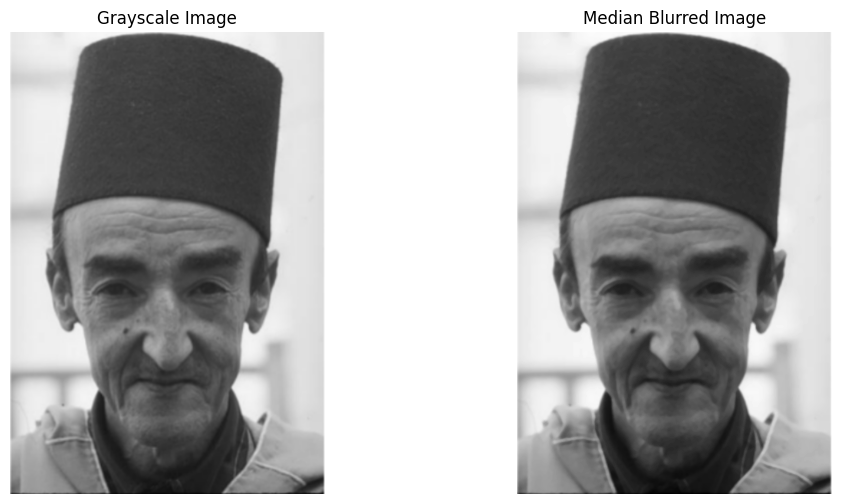

In [10]:
# Noise reduction using median filter
median_blur = cv2.medianBlur(gray, 5)
show_images('Grayscale Image', gray, 'Median Blurred Image', median_blur)

## Edge Detection
#### Detects edges in the image using the Laplacian filter.
#### - **cv2.CV_8U**: Defines the output data type.
#### - **ksize=5**: Determines the kernel size for detecting edges.
#### Kernel size controls the size of the neighborhood used to calculate second-order derivatives, influencing edge detection sensitivity.

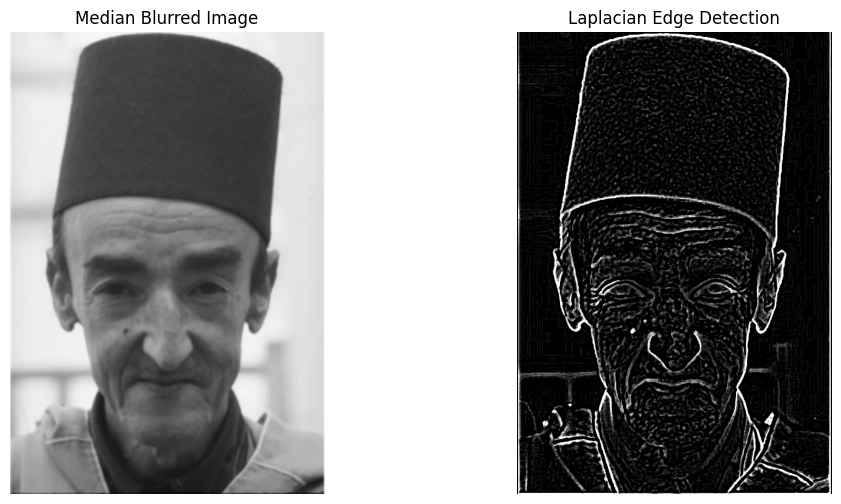

In [11]:
# Edge detection using Laplacian filter
edges = cv2.Laplacian(median_blur, cv2.CV_8U, ksize=5)
show_images('Median Blurred Image', median_blur, 'Laplacian Edge Detection', edges)

## Thresholding
#### Applies a binary threshold to enhance edge visibility.
#### - **Threshold value (100)**: Pixels above this value become white (255) "which is the maximum pixel value", others become black (0).
#### - **cv2.THRESH_BINARY_INV**: Inverts the threshold result (white edges on black background).

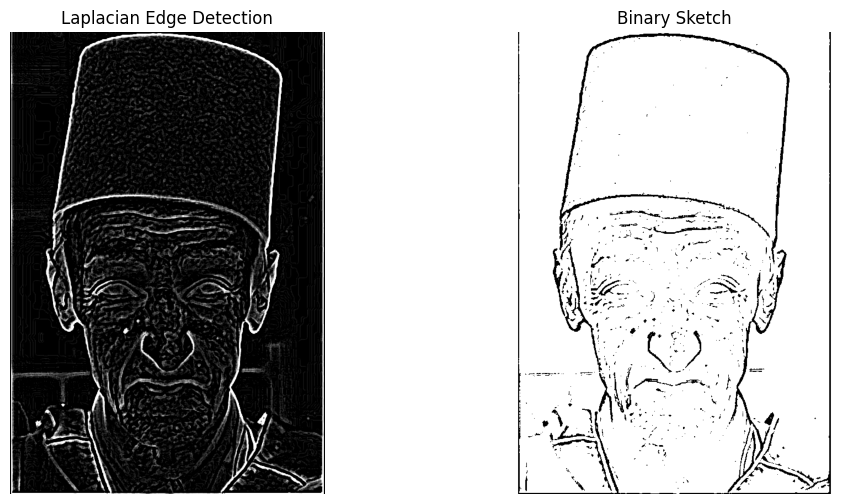

In [12]:
# Binary thresholding to enhance edges
_, sketch = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY_INV)
show_images('Laplacian Edge Detection', edges, 'Binary Sketch', sketch)

## Color Smoothing
### Uses a bilateral filter to smooth colors while preserving edges.
#### - **d=9**: Defines the diameter of the pixel neighborhood size.
#### - **sigmaColor=75**: Controls how colors mix using color space filter strength.
#### - **sigmaSpace=75**: Controls spatial smoothing of spatial distance filter strength.

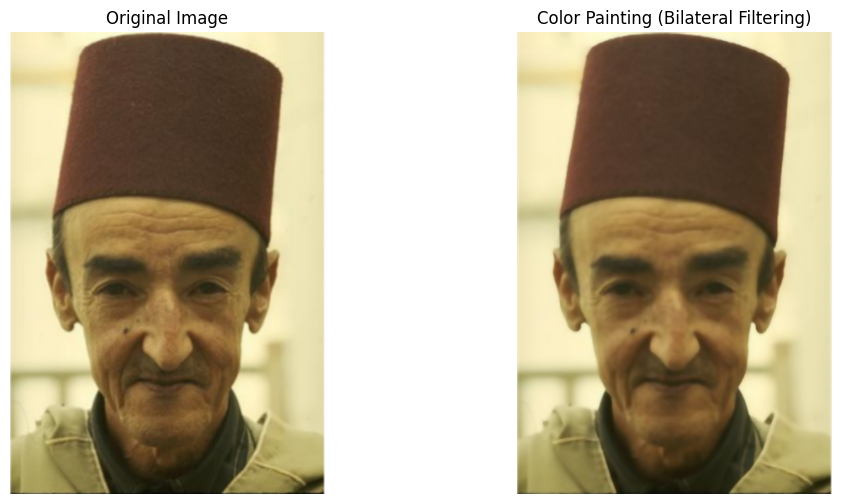

In [13]:
# Bilateral filtering for color smoothing
color_painting = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)
show_images('Original Image', image, 'Color Painting (Bilateral Filtering)', color_painting)

## Convert Sketch to 3-Channel
#### Converts the binary sketch to a 3-channel image so it can be merged with the color painting.


In [14]:
# Convert sketch to 3-channel
sketch_colored = cv2.cvtColor(sketch, cv2.COLOR_GRAY2BGR)

## Edge Overlay
#### Combines the color painting with the sketch using a bitwise AND operation.
#### - This keeps colors from `color_painting` where `sketch_colored` is not black.

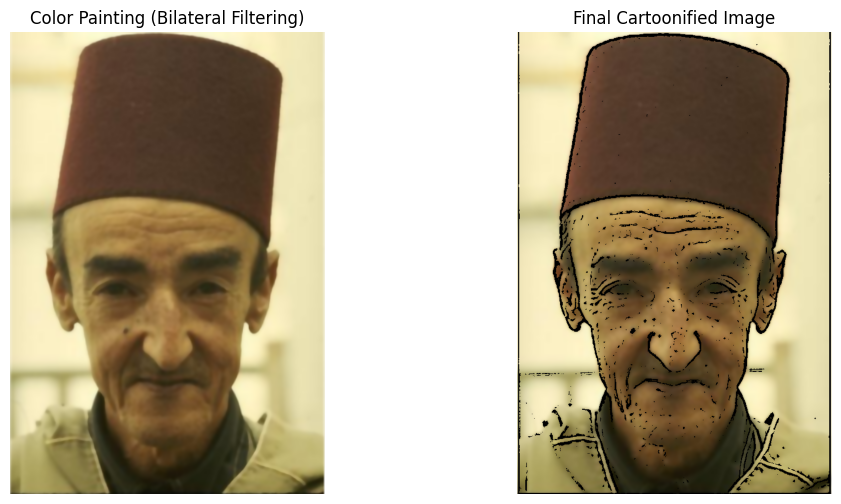

In [15]:
# Overlaying edges on color painting
cartoon = cv2.bitwise_and(color_painting, sketch_colored)
show_images('Color Painting (Bilateral Filtering)', color_painting, 'Final Cartoonified Image', cartoon)

In [16]:
# Saving the final image
cv2.imwrite('cartoonified.jpg', cartoon)

True